In [1]:
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c fruit-ripening

100% 2.18G/2.18G [01:41<00:00, 23.5MB/s]
100% 2.18G/2.18G [01:42<00:00, 23.0MB/s]


In [4]:
!unzip /content/fruit-ripening.zip

Archive:  /content/fruit-ripening.zip
  inflating: info.csv                
  inflating: submission.csv          
  inflating: test/test/abdy9380.png  
  inflating: test/test/adua0170.png  
  inflating: test/test/aebq0222.png  
  inflating: test/test/aeew6117.png  
  inflating: test/test/aegl6733.png  
  inflating: test/test/agsl3254.png  
  inflating: test/test/ahzf2150.png  
  inflating: test/test/aixr7229.png  
  inflating: test/test/ajfw9839.png  
  inflating: test/test/ajxc0220.png  
  inflating: test/test/akdx3674.png  
  inflating: test/test/alrn1123.png  
  inflating: test/test/amas5936.png  
  inflating: test/test/amlq9972.png  
  inflating: test/test/aomz7213.png  
  inflating: test/test/aooo6845.png  
  inflating: test/test/aoyw0960.png  
  inflating: test/test/arpe0545.png  
  inflating: test/test/asun5170.png  
  inflating: test/test/atwz8157.png  
  inflating: test/test/awyr6735.png  
  inflating: test/test/axdq4598.png  
  inflating: test/test/bagy2562.png  
  inflating:

In [5]:
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.2 MB/s eta 0:00:00


In [6]:
!pip install -Uq fastai2
import fastai2
from fastai2.vision import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 3.4 MB/s eta 0:00:00


In [7]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

Mounted at /content/gdrive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
fastai2. __version__

'0.0.30'

In [10]:
fruit_class = {"สับปะรดที่มีเปลือกตาสีเขียวทั้งหมด": 0,
    "สับปะรดที่มีเปลือกตาเหลืองไม่เกิน 20% ของผล (ไม่เกิน 2 ตา)": 1,
    "สับปะรดที่มีเปลือกตาเหลือง อยู่ระหว่าง 20% - 40% ของผล (ไม่เกิน 2 ตา)": 2,
    "สับปะรดที่มีเปลือกตาเหลือง อยู่ระหว่าง 40% - 55% ของผล (4-6 ตา)": 3,
    "สับปะรดที่มีเปลือกตาเหลือง ไม่น้อยกว่า 55% แต่ไม่เกิน 90% ของผล (7-9 ตา)": 4,
    "สับปะรดที่มีเปลือกตาสีเหลืองมากกว่า 90% แต่มีสีส้มน้อยกว่า 20% ของผล": 5,
    "สับปะรดที่มีเปลือกตาสีส้มแดงประมาณ 20 - 100%": 6,
    "เปลือกน้ำตาลอมแดง แสดงอาการเน่า (อายุมากกว่า 165 วัน)": 7}
path = '/content/train/train'
p_path=Path(path)
fns = get_image_files(path)
fns

(#2688) [Path('/content/train/train/6/IMG_20220426_175138.png'),Path('/content/train/train/6/IMG_20220426_224932.png'),Path('/content/train/train/6/IMG_20220426_224219.png'),Path('/content/train/train/6/IMG_20220426_223534.png'),Path('/content/train/train/6/IMG_20220426_223531.png'),Path('/content/train/train/6/IMG_20220426_223519.png'),Path('/content/train/train/6/IMG_20220426_175155.png'),Path('/content/train/train/6/IMG_20220426_175145.png'),Path('/content/train/train/6/IMG_20220426_224214.png'),Path('/content/train/train/6/IMG_20220426_223551.png')...]

In [11]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [12]:
fr = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),
    batch_tfms = [*aug_transforms(max_rotate=30, flip_vert=True),Normalize.from_stats(*imagenet_stats)]
)

In [13]:
get_image_files("/content/test")

(#673) [Path('/content/test/test/lxth7181.png'),Path('/content/test/test/cktr2120.png'),Path('/content/test/test/gqov6259.png'),Path('/content/test/test/hxpt6605.png'),Path('/content/test/test/snji4156.png'),Path('/content/test/test/nykr7941.png'),Path('/content/test/test/salw0888.png'),Path('/content/test/test/zhqo6427.png'),Path('/content/test/test/khsx8424.png'),Path('/content/test/test/vchc4607.png')...]

In [14]:
fns = get_image_files('/content/train/train')
fns

(#2688) [Path('/content/train/train/6/IMG_20220426_175138.png'),Path('/content/train/train/6/IMG_20220426_224932.png'),Path('/content/train/train/6/IMG_20220426_224219.png'),Path('/content/train/train/6/IMG_20220426_223534.png'),Path('/content/train/train/6/IMG_20220426_223531.png'),Path('/content/train/train/6/IMG_20220426_223519.png'),Path('/content/train/train/6/IMG_20220426_175155.png'),Path('/content/train/train/6/IMG_20220426_175145.png'),Path('/content/train/train/6/IMG_20220426_224214.png'),Path('/content/train/train/6/IMG_20220426_223551.png')...]

In [15]:
dls = fr.dataloaders('/content/train/train')

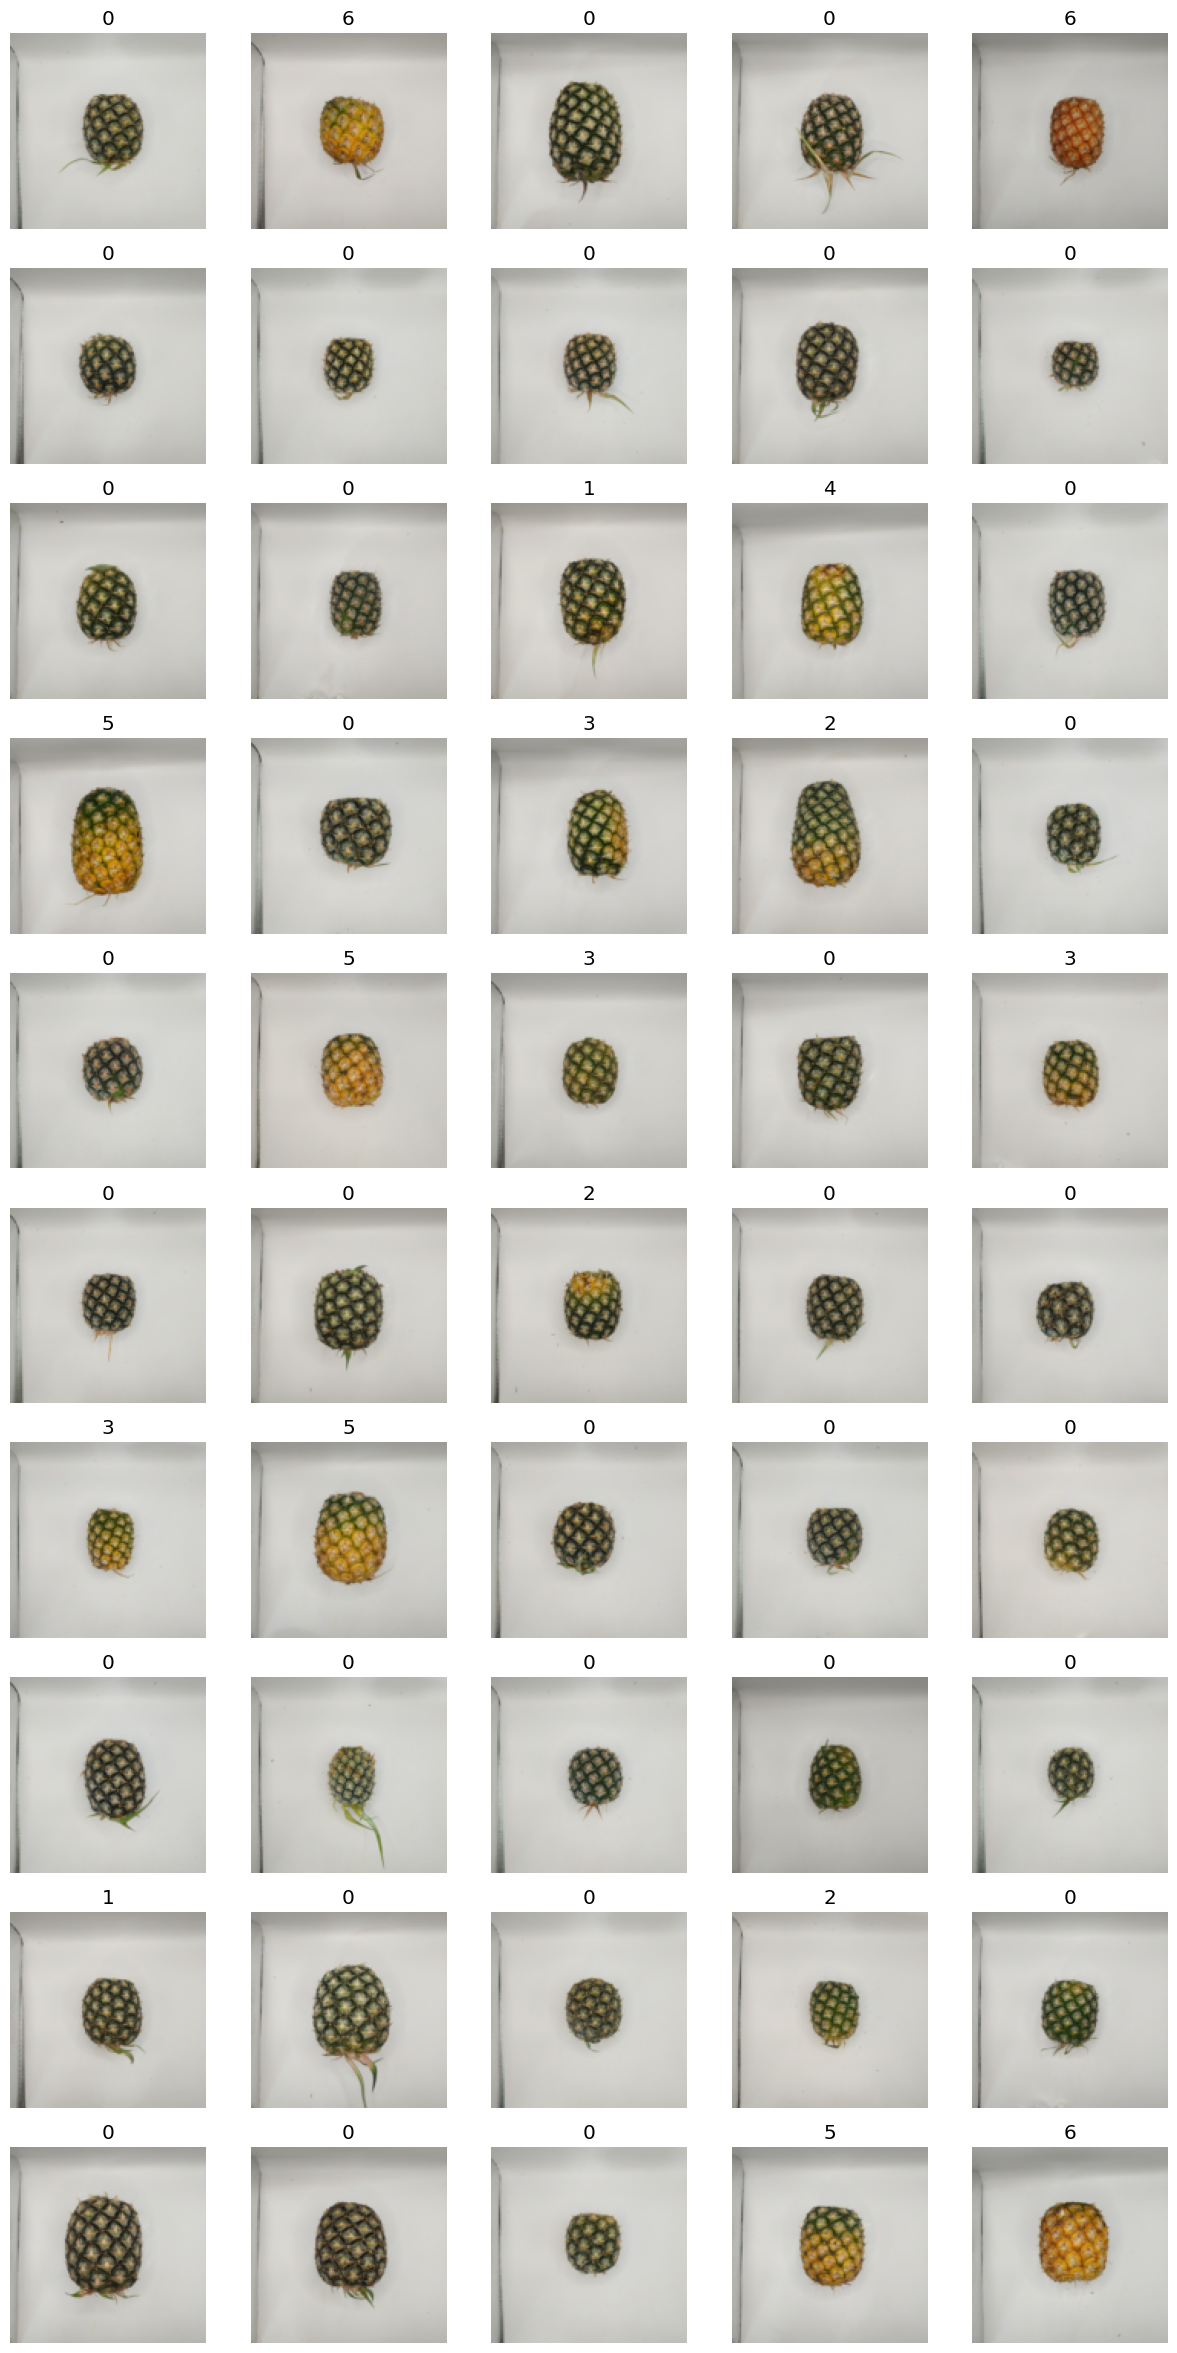

In [16]:
dls.valid.show_batch(max_n=50, nrows=10)

In [17]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(50)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61

epoch,train_loss,valid_loss,error_rate,time
0,2.312185,1.080205,0.255121,00:51


epoch,train_loss,valid_loss,error_rate,time
0,1.020454,0.674705,0.178771,00:53
1,0.834711,0.597527,0.162011,00:49
2,0.738321,0.518871,0.148976,00:50
3,0.654968,0.552076,0.137803,00:53
4,0.615758,0.566016,0.150838,00:47
5,0.593802,0.484892,0.135940,00:47
6,0.533069,0.380390,0.121043,00:52
7,0.493423,0.451500,0.134078,00:48
8,0.463100,0.437906,0.134078,00:45
9,0.456796,0.445039,0.132216,00:51


epoch,train_loss,valid_loss,error_rate,time
0,1.020454,0.674705,0.178771,00:53
1,0.834711,0.597527,0.162011,00:49
2,0.738321,0.518871,0.148976,00:50
3,0.654968,0.552076,0.137803,00:53
4,0.615758,0.566016,0.150838,00:47
5,0.593802,0.484892,0.135940,00:47
6,0.533069,0.380390,0.121043,00:52
7,0.493423,0.451500,0.134078,00:48
8,0.463100,0.437906,0.134078,00:45
9,0.456796,0.445039,0.132216,00:51


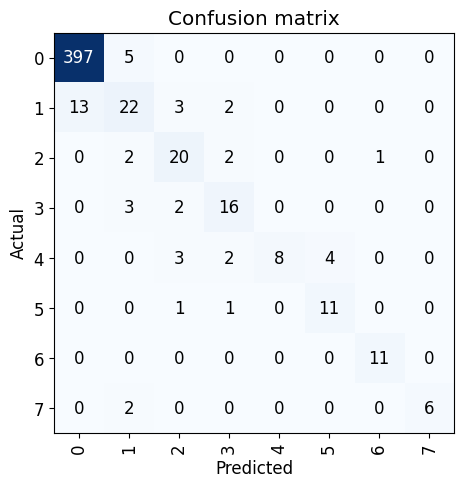

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

SuggestedLRs(valley=9.999999747378752e-06)

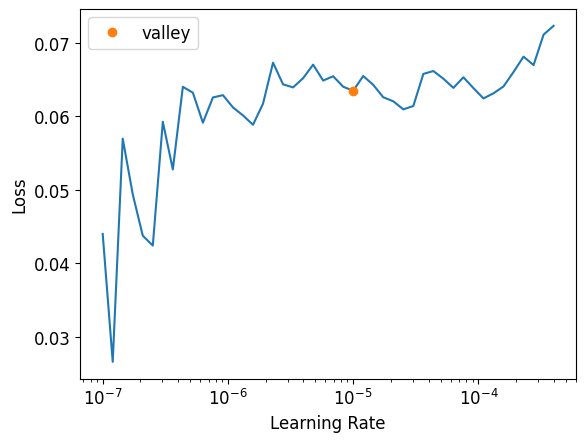

In [29]:
from fastai.vision.all import *
learn.lr_find() # หา learning rate ที่เหมาะสม

In [32]:
learn.fine_tune(epochs=6, freeze_epochs=1, base_lr=0.000009999999747378752)

epoch,train_loss,valid_loss,error_rate,time
0,0.061184,0.311928,0.085661,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.056414,0.318524,0.083799,00:48
1,0.062515,0.311885,0.085661,00:51
2,0.062217,0.315636,0.085661,00:48
3,0.067284,0.315539,0.085661,00:54
4,0.070136,0.315017,0.085661,00:50
5,0.065880,0.308965,0.085661,00:48


#ทำนายผล


In [33]:
interp.most_confused(min_val=5)

[('1', '0', 13), ('0', '1', 5)]

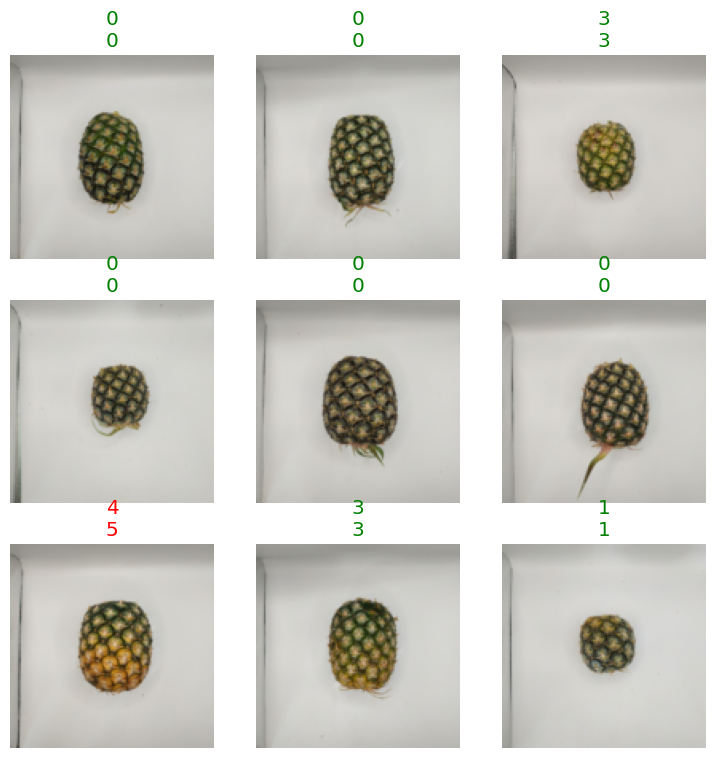

In [34]:
learn.show_results(shuffle=True)

##Save model

In [35]:
learn.export("dbc_resnet50_v2_fastai.pkl")

#Predict

In [36]:
from fastbook import *
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

learn_inf = load_learner('/content/dbc_resnet50_v2_fastai.pkl')

In [37]:
learn_inf.predict("/content/test/test/adua0170.png")

('0',
 tensor(0),
 tensor([9.9914e-01, 1.5884e-04, 8.8498e-05, 3.7636e-04, 7.4263e-05, 6.2115e-05, 6.9656e-05, 2.7625e-05]))

In [38]:
from fastbook import *
from pathlib import Path
import pandas as pd
from fastbook import *
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

# Load the learner
learn_inf = load_learner('/content/dbc_resnet50_v2_fastai.pkl')

# Path to your test images folder
test_folder = Path('/content/test/test')

# Get a list of image file paths
image_files = sorted(test_folder.glob('*.png'))  # Change the pattern if needed

# Initialize lists to store predictions and image filenames
image_filenames = []
predictions = []

# Loop through image files
for img_path in image_files:
    img = PILImage.create(img_path)

    # Make prediction
    pred, pred_idx, probs = learn_inf.predict(img)

    # Append the image filename and prediction to the lists
    image_filenames.append(img_path.name)
    predictions.append(pred)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'FileName': image_filenames, 'Class': predictions})

# Save the DataFrame to a CSV file
results_csv_path = 'restnet50_v2.csv'
results_df.to_csv(results_csv_path, index=False)

print(f'Predictions saved to {results_csv_path}')


Predictions saved to restnet50_v2.csv
